This notebook is contructed of preliminary exploratory data analysis for Rong360's dataset

### Step 1 Background
- Study the business model of **Rong360** and 
identify the **fundamental inefficiency** it resolves in the traditional lending market.
    Complience is very dificult 
    Rather than going form bank to bank for a loan, consumers can visit a single platform to view all their options 
    Aids loan approvals for individuals and micro businesses especially in rural areas where it's dificult to access banks 
- Visit the company website to understand more about the company practice.

http://www.rong360.com/about/, https://www.rong360.com/. Google translate them if necessary.
- Answer why should a typical customer uses **Rong360**. Answer why a bank/small lender would use **Rong360** to access its client base.        
- Read 
     - https://www.boardofinnovation.com/blog/10-innovative-fintech-business-models/,
     - https://www.mckinsey.com/industries/financial-services/our-insights/banking-matters/scanning-the-fintech-landscape, 
     - https://www.fintechfutures.com/2019/12/white-paper-what-will-the-future-of-banking-look-like/, 
     - https://www.fintechfutures.com/2019/03/the-new-business-models-of-banking/   
    for the several important disruptive business models in fintech industry.
- Read the attaching help files of **Rong360** dataset to gain understanding on the meanings of the orders, quality, user, product columns.

### Step 2 Data Analysis
- Remember that data analysis can be used either to gain business insights, or to gain insights for machine learning model design.
- During the data analysis stage, we would propose several ideas for you to work on.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!ls -l

In [14]:
orders = pd.read_csv('Rong/order_train.txt', sep = "\t")
order_help = pd.read_csv('Rong/order_help.txt', sep = "\t")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b50630>,
      dtype=object)

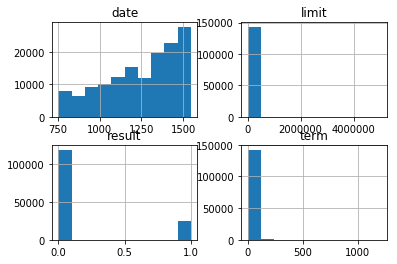

In [15]:
orders.hist()

In [16]:
order_help

,"user_id：用户id, user ID"
0,"product_id：产品id, product ID"
1,date：不同日期，值越大代表离当前越近
2,"term：申请期限, application term"
3,"limit：申请金额, application limit"
4,"result：0代表贷款申请没有被批准，1代表贷款申请获得批准, 0: rejected, ..."


In [17]:
!ls -l

total 392
-rw-r--r--   1 itadmin  staff  197984 Mar 17 17:13 EDA_draft.ipynb
drwxr-xr-x@ 17 itadmin  staff     544 Mar  9 13:07 Rong


In [18]:
users = pd.read_csv('Rong/user.final.txt', sep = '\t')
users_help = pd.read_csv('Rong/user_help.txt', sep = "\t")

In [19]:
print("percentage of rejection {}".format(orders.result.value_counts()[0]/len(orders)))
print(orders.nunique())
print(orders.shape)

percentage of rejection 0.829761372527104
user_id       134055
product_id     12280
date             793
term              60
limit            420
result             2
dtype: int64
(143152, 6)


In [20]:
orders.columns
# is it possible for a user to apply to one product multiple times?
orders.groupby('user_id').agg({'product_id':'count', "result":'median'}).sort_values('product_id',ascending=False)

,product_id,result
user_id,,
7ae3cc746e313aefc52861c1c8d367c9,36,0.0
17d6e5d1a370f4dfd809aa8bce72c10b,14,0.0
7e0eb70e5c88103d481ea542cb8eebbc,9,0.0
8850cbcd536dd84ae0bd7cff28ea97dc,9,0.0
7192802bfb058c81c490f2fefee4ea31,7,0.0
114ebbdda2a545505418fe1886eea6f2,6,0.0
3833c1c78080ce3b035d306a1c52ab00,6,0.0
b5bd00774997735b4755d6bd116537ee,6,0.0
426f80c5e20e5da6d82632f59310df14,6,0.0


In [21]:
orders.groupby('term').agg({'product_id':'count', "result":'median'}).sort_values('term',ascending=False)

,product_id,result
term,,
1200,1,0.0
720,4,0.0
360,298,0.0
300,67,0.0
240,562,0.0
196,1,0.0
180,110,0.0
120,1912,0.0
108,2,0.0


In [22]:
!ls -l

total 392
-rw-r--r--   1 itadmin  staff  197984 Mar 17 17:13 EDA_draft.ipynb
drwxr-xr-x@ 17 itadmin  staff     544 Mar  9 13:07 Rong


In [23]:
product = pd.read_csv('Rong/product.final.txt', sep = '\t')
#quality = pd.read_csv('quality.final.txt', sep = '\t')

In [24]:
print(product.isnull().sum())
print("+"*50)
print(orders.isnull().sum())
print("="*50)
print(users.isnull().sum())


product_id                0
city_id                   0
bank_id                   0
product_type              0
guarantee_type            0
loan_term_min             0
loan_term_max             0
loan_term_type            0
decision_cycle            0
loan_cycle                0
repayment_type            0
loan_quota_min            0
loan_quota_max            0
interest_rate_type        0
guarantee_required        0
standard_type             0
apply_num                 0
fangkuan_num              0
is_p2p                    0
id                        0
house_register            0
business_license          0
legal_person              0
married                   0
car                       0
income                    0
house                     0
tax                       0
socialsecurity            0
bank                      0
lifecost                  0
early_repayment       40991
penalty               41018
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
user_id     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11964e940>,
      dtype=object)

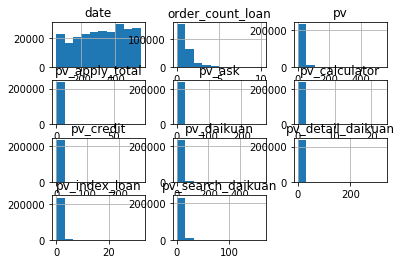

In [25]:
users.hist()


translate the picture
How do we deal with duplicates in Quality/ what exactly is it tracking?
What is the original kaggle like website? 
How do we start creating a SQL Db to query from?



In [26]:
bank_products = product.groupby(['bank_id']).agg({'product_id':'count'})
#this is the amount of products per bank
products_per_bank = bank_products['product_id'].value_counts()
#this is the amount of banks with the same num products
# 624 banks have 1 product
products_per_bank[:7].values

array([624, 417, 412, 342, 326, 177, 107])

Text(0.5, 1.0, 'Top num products per bank')

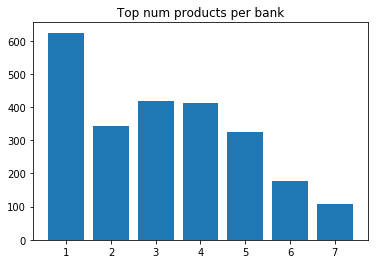

In [27]:
plt.bar(x=products_per_bank[:7].index, height=products_per_bank[:7].values)
plt.title("Top num products per bank")

In [28]:
print(product.columns)
city_products = product.groupby(['city_id']).agg({'product_id':'count'})
#this is the amount of products per city
city_products.sort_values('product_id',ascending=False).describe()

Index(['product_id', 'city_id', 'bank_id', 'product_type', 'guarantee_type',
       'loan_term_min', 'loan_term_max', 'loan_term_type', 'decision_cycle',
       'loan_cycle', 'repayment_type', 'loan_quota_min', 'loan_quota_max',
       'interest_rate_type', 'guarantee_required', 'standard_type',
       'apply_num', 'fangkuan_num', 'is_p2p', 'id', 'house_register',
       'business_license', 'legal_person', 'married', 'car', 'income', 'house',
       'tax', 'socialsecurity', 'bank', 'lifecost', 'early_repayment',
       'penalty'],
      dtype='object')


,product_id
count,106.000000
mean,456.915094
std,833.674735
min,1.000000
25%,18.250000
50%,106.000000
75%,518.750000
max,4575.000000


In [29]:
#find out loan_quota_min and loan_quota_max info
quotas = product.groupby('product_id').agg({'loan_quota_min':'sum', 'loan_quota_max':'sum'})
quotas.sort_values(['loan_quota_min','loan_quota_max'])
# why are some of them both zero? Is the the p2p? no there are onlt 2 p2p products
#  how many loans have the same min?
quota_mins = quotas.loan_quota_min.value_counts()
quota_mins[:10]

10000      23695
20000       5883
50000       5578
100000      3730
30000       3008
500000      1711
300000      1070
200000       870
1000000      493
40000        392
Name: loan_quota_min, dtype: int64

In [30]:
product.groupby('product_id').agg({'apply_num':'sum'}).sort_values('apply_num',ascending=False)


,apply_num
product_id,
e07bceab69529b0f0b43625953fbf2a0,16397
02180771a9b609a26dcea07f272e141f,12367
dc20d1211f3e7a99d775b26052e0163e,11060
2723d092b63885e0d7c260cc007e8b9d,9096
1f0e3dad99908345f7439f8ffabdffc4,8533
70efdf2ec9b086079795c442636b55fb,8081
7853fd10e6afbf1299dcfbfde51b1d52,7748
e721a54a8cf18c8543d44782d9ef681f,7162
204da255aea2cd4a75ace6018fad6b4d,6483


In [31]:
product.groupby('product_id','interest_rate_type').agg({'interest_rate_type':'count'})


ValueError: No axis named interest_rate_type for object type <class 'type'>

In [ ]:
pd.read_csv('product_help.txt')

The banks would like to know what types of loan products are more popular in the market. Please analyze the data and provide insights on what types of products are most popular. Do their popularities evolve w.r.t. time or vary with applicants' locations?

In [32]:
products = orders.merge(product, on='product_id')
products_users = products.merge(users, on = 'user_id')
products.columns

Index(['user_id', 'product_id', 'date', 'term', 'limit', 'result', 'city_id',
       'bank_id', 'product_type', 'guarantee_type', 'loan_term_min',
       'loan_term_max', 'loan_term_type', 'decision_cycle', 'loan_cycle',
       'repayment_type', 'loan_quota_min', 'loan_quota_max',
       'interest_rate_type', 'guarantee_required', 'standard_type',
       'apply_num', 'fangkuan_num', 'is_p2p', 'id', 'house_register',
       'business_license', 'legal_person', 'married', 'car', 'income', 'house',
       'tax', 'socialsecurity', 'bank', 'lifecost', 'early_repayment',
       'penalty'],
      dtype='object')

In [33]:
products_users = products_users[['apply_num', 'pv', 'product_id', 'loan_cycle']]
print(products_users.shape)
products_ = products_users.groupby('product_id').agg({'apply_num':'count', 'pv':'sum', 'loan_cycle':'mean'})
products_.columns = ['apply_num_total', 'pv_total', 'loan_avg']

(202930, 4)


In [36]:
products_.sort_values(['apply_num_total', 'pv_total']).describe()

,apply_num_total,pv_total,loan_avg
count,9315.000000,9315.00000,9315.000000
mean,21.785293,316.26452,4.619324
std,91.847029,1242.58607,6.286859
min,1.000000,1.00000,0.000000
25%,2.000000,37.00000,2.000000
50%,6.000000,98.00000,3.000000
75%,16.000000,259.00000,4.000000
max,3919.000000,53002.00000,90.000000


(5, 5000)

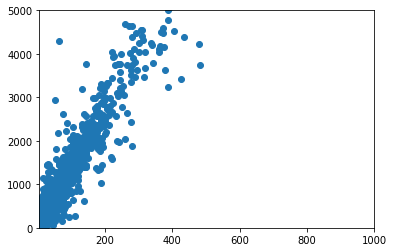

In [40]:
plt.scatter(x=products_.apply_num_total, y=products_.pv_total)
plt.xlim(5, 1000)
plt.ylim(5, 5000)

In [43]:
product.product_type.value_counts()

100    37598
6       5414
1       2343
5       1109
102      879
101      598
3        246
4        157
0         64
2         25
Name: product_type, dtype: int64

In [50]:
product.loc[product.product_type.isin([6,100])]

,product_id,city_id,bank_id,product_type,guarantee_type,loan_term_min,loan_term_max,loan_term_type,decision_cycle,loan_cycle,...,married,car,income,house,tax,socialsecurity,bank,lifecost,early_repayment,penalty
0,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,6,2,6,60,2,1,2,...,0,0,1,0,0,0,0,0,1.0,1.0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,c4ca4238a0b923820dcc509a6f75849b,c81e728d9d4c2f636f067f89cc14862c,6,2,1,60,1,2,3,...,0,0,1,0,0,0,1,1,NaN,NaN
3,a87ff679a2f3e71d9181a67b7542122c,c4ca4238a0b923820dcc509a6f75849b,c81e728d9d4c2f636f067f89cc14862c,6,2,6,36,2,2,3,...,0,0,0,0,0,0,1,1,1.0,1.0
4,e4da3b7fbbce2345d7772b0674a318d5,c4ca4238a0b923820dcc509a6f75849b,c81e728d9d4c2f636f067f89cc14862c,6,2,6,24,2,2,4,...,0,0,0,1,0,1,1,0,1.0,1.0
15,c74d97b01eae257e44aa9d5bade97baf,c4ca4238a0b923820dcc509a6f75849b,1679091c5a880faf6fb5e6087eb1b2dc,6,2,1,12,0,5,8,...,0,0,1,0,0,0,1,0,NaN,NaN
16,70efdf2ec9b086079795c442636b55fb,c4ca4238a0b923820dcc509a6f75849b,e4da3b7fbbce2345d7772b0674a318d5,6,2,12,48,1,2,3,...,0,1,1,1,0,0,1,1,1.0,1.0
17,6f4922f45568161a8cdf4ad2299f6d23,c4ca4238a0b923820dcc509a6f75849b,8f14e45fceea167a5a36dedd4bea2543,6,2,6,48,2,2,3,...,0,0,0,1,0,0,1,0,1.0,1.0
18,1f0e3dad99908345f7439f8ffabdffc4,c4ca4238a0b923820dcc509a6f75849b,c9f0f895fb98ab9159f51fd0297e236d,6,2,3,36,2,4,5,...,0,0,1,0,0,0,1,0,1.0,1.0
19,98f13708210194c475687be6106a3b84,c4ca4238a0b923820dcc509a6f75849b,45c48cce2e2d7fbdea1afc51c7c6ad26,6,2,12,36,2,1,2,...,0,0,0,0,0,0,1,0,1.0,1.0
21,b6d767d2f8ed5d21a44b0e5886680cb9,c4ca4238a0b923820dcc509a6f75849b,45c48cce2e2d7fbdea1afc51c7c6ad26,6,1,12,60,1,5,22,...,0,1,0,1,0,0,0,0,NaN,NaN


In [65]:
by_product = product.groupby('product_type').agg({'loan_quota_min':'median','loan_quota_max':'median', 'apply_num':'mean', 'fangkuan_num':'mean'})
by_product.sort_values('apply_num')

,loan_quota_min,loan_quota_max,apply_num,fangkuan_num
product_type,,,,
0,0,0,0.000000,0.000000
5,500000,20000000,0.000000,0.000000
101,30000,500000,0.234114,0.025084
102,30000,500000,0.261661,0.058020
100,10000,500000,5.772674,1.064711
4,200000,5000000,18.286624,2.363057
3,50000,1500000,38.829268,5.479675
1,30000,500000,52.991037,11.445156
6,10000,300000,126.212412,29.150166


In [84]:
results = products.groupby(['bank_id', 'product_id']).agg({'result':'mean'}).reset_index()
approved_loans = results[results.result > 0.0].sort_values('result', ascending = False)

In [89]:
always_approved = approved_loans.groupby('bank_id').agg({'result':'median'}).reset_index().sort_values('result')
always_approved = always_approved[always_approved.result == 1.0]

In [108]:
always_approved_banks = always_approved.merge(product, on = 'bank_id', how = 'inner')
always_approved.merge(product, on = 'bank_id', how = 'inner').product_type.value_counts()
# The proportion of applicants per bank 

6    80
1    25
5     3
4     2
3     1
Name: product_type, dtype: int64

In [111]:
always_approved_banks.groupby('bank_id').agg({'apply_num':'count'}).reset_index().sort_values('apply_num')

,bank_id,apply_num
22,db5bdc8ad46ab6087d9cdfd8a8662ddf,1
16,94263e205faec4311b1859acceeafe26,1
11,77330e1330ae2b086e5bfcae50d9ffae,1
2,1e747ddbea997a1b933aaf58a7953c3c,2
1,1ceb3ad80c6675f705c7fef98012e9e1,3
3,208983b70b0fc2f3844880698af78a6f,3
5,3b5f4f19719aa9a67efe63169ce94037,3
19,c70341de2c112a6b3496aec1f631dddd,3
25,f62a14520d684eec4080c6bd4c643b24,3
0,115c343463041f8763d7552fdce43c9f,4


### DA Question 4: Identify the driving factors of higher approval rates
- In this question we would like to ask, what are the key driving factors for a bank, or for a product to have higher or lower loan
approval rate to its applicants?
- Does a bank with a high approval rate does so with all its products, or does it discriminate among different products?
Any rationale that you can think of?
- Across the board, what is the main rationale for a bank to reject or approve loans. Can you use data analysis to
identify it?
- You can also introduce machine learning technique to gain additional insights regarding this.
- The dataset consists of the orders, quality, product, users, where different facets of the loan applications are recorded.
- Evaluate the online user behavior's (those **pv**) influences on the approval rates.
- Evaluate the user credit quality (including education, marriage status, credit history, income, ...) influences on the approval rates.
- Evaluate the loan product attributes (loan term, document requirement, prepayment support ...) influence on the approval rates.
- Evaluate the bank attributes (size/city count, applicant counts, product count, weighted average loan term) on the bank (or the bank's products)
 approval rates.                       
- Among all these factors, which are more important in the classification task of approval outcomes? You could use
$\chi^2$ test or machine learning based feature-importance to gain insights on this.                                                                                                                    

### ML Project Idea 3: Building a Recommendation System
- The **order_train.txt** encodes the interaction between the different users and different products.
- Given that there are $130K+$ distinct users and $12K+$ products, the information can be used to build a product recommender for the customers.
- There are several approaches to build a recommender.
- Given that the same user seldom applies for many loans, it is vital to use the loan application info from the other 'similar' users.
Use cluster analysis to study 'similar' users and use it for recommendations.
- The indicator matrix of user-product pairs, where the entry of the indicator matrix at (user, product) is 1 if the user has applied for 
the product. The value is zero otherwise. A well known approach of **matrix factorization** can be used to factor the
indicator matrix. Some models (like https://turi.com/products/create/docs/graphlab.toolkits.recommender.html) even would allow using side user/product attributes.
- Another variant of matrix factorization technique is **NMF** (non-negative matrix factorization). 
Your team can use **sklearn**'s version of **NMF** to study recommendation problem.
- Another idea to combine clustering technique with **matrix factorization** is to use a suitable **clustering** technique to lump the users (or the products) and build a recommender on the reduced space.

